Imports

In [2]:

import pandas as pd
import kagglehub
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Load Dataset

In [3]:
path = kagglehub.dataset_download("ankushpanday2/colorectal-cancer-global-dataset-and-predictions")

print("Path to dataset files:",path)
df=pd.read_csv(path + "/colorectal_cancer_dataset.csv")
df.head()

Using Colab cache for faster access to the 'colorectal-cancer-global-dataset-and-predictions' dataset.
Path to dataset files: /kaggle/input/colorectal-cancer-global-dataset-and-predictions


,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


Data Exploration

In [9]:

#df = df.drop('Patient_ID', axis=1)

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


  Country  Age Gender Cancer_Stage  Tumor_Size_mm Family_History  \
0      UK   77      M    Localized             69             No   
1      UK   59      M    Localized             33             No   
2   Japan   66      M     Regional             17             No   
3     USA   83      M     Regional             14             No   
4  France   66      M    Localized             34             No   

  Smoking_History Alcohol_Consumption Obesity_BMI Diet_Risk  ...  \
0              No                 Yes  Overweight       Low  ...   
1              No                  No  Overweight  Moderate  ...   
2             Yes                  No      Normal       Low  ...   
3              No                  No       Obese      High  ...   
4             Yes                  No      Normal       Low  ...   

  Survival_5_years Mortality Healthcare_Costs Incidence_Rate_per_100K  \
0              Yes        No            54413                      50   
1              Yes        No        

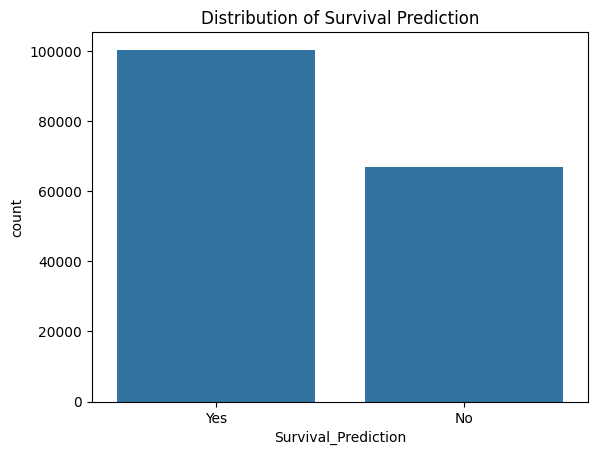

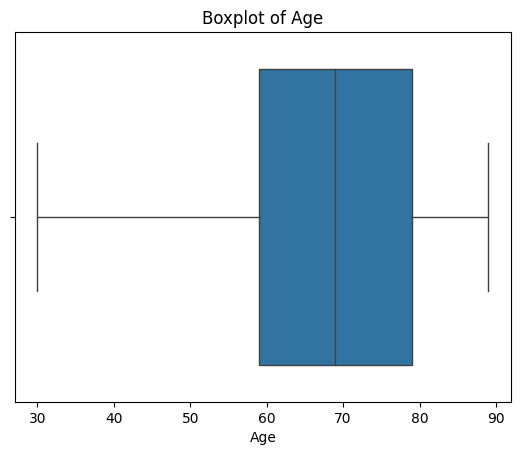

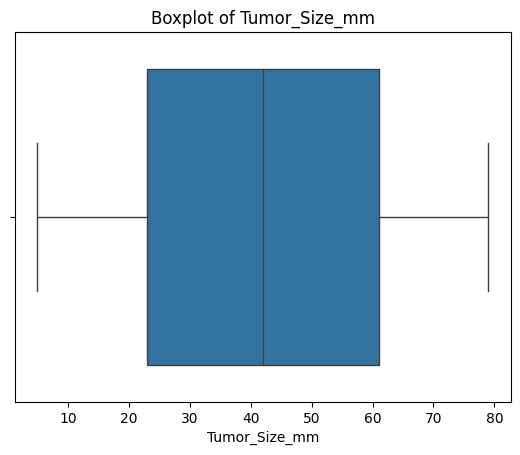

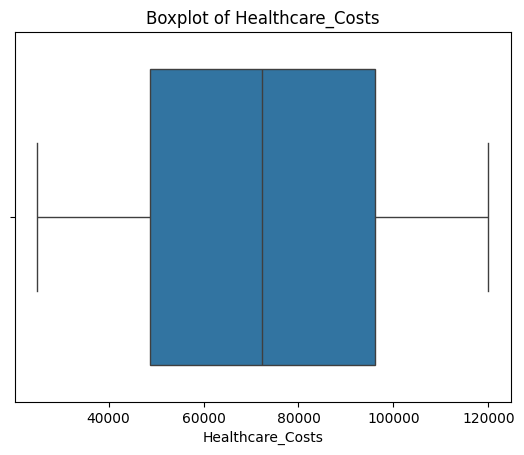

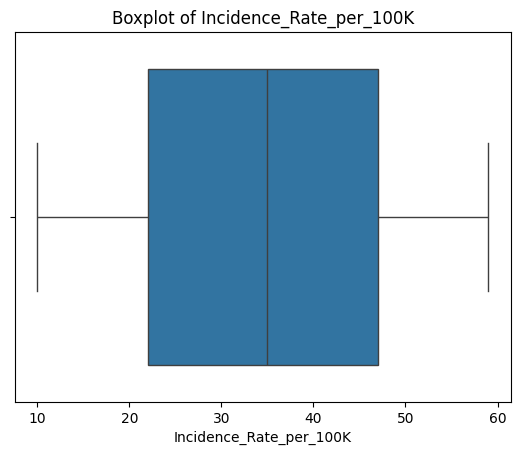

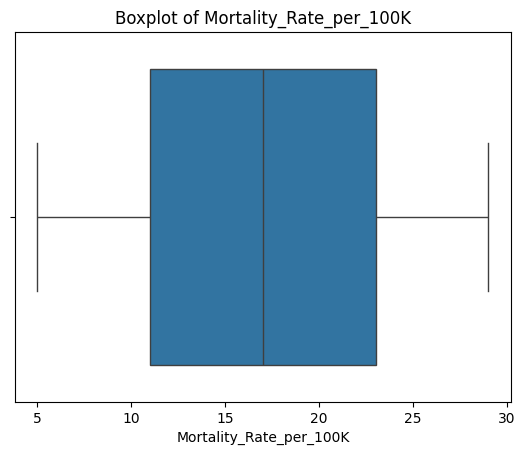

In [10]:
sns.countplot(x='Survival_Prediction',data=df)
plt.title('Distribution of Survival Prediction')
plt.show()

numerical_cols = ['Age','Tumor_Size_mm','Healthcare_Costs','Incidence_Rate_per_100K','Mortality_Rate_per_100K']
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Selecting features and target

In [11]:
X = df[["Age","Healthcare_Costs","Incidence_Rate_per_100K","Mortality_Rate_per_100K"]]
y = df["Tumor_Size_mm"]
print(X.head())
print(X)
print(y)

   Age  Healthcare_Costs  Incidence_Rate_per_100K  Mortality_Rate_per_100K
0   77             54413                       50                        5
1   59             76553                       37                       25
2   66             62805                       54                       27
3   83             89393                       45                       11
4   66             66425                       15                       27
        Age  Healthcare_Costs  Incidence_Rate_per_100K  \
0        77             54413                       50   
1        59             76553                       37   
2        66             62805                       54   
3        83             89393                       45   
4        66             66425                       15   
...     ...               ...                      ...   
167492   69            100924                       57   
167493   79             90331                       39   
167494   74             9063

In [12]:
#Train / test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#function to evaluate models
def evaluate_model(model,X_train,y_train,X_test,y_test,name="Model"):
    y_pred = model.predict(X_test)
    return {
        "Model":name,
        "R2":r2_score(y_test,y_pred),
        "MSE":mean_squared_error(y_test,y_pred),
        "MAE":mean_absolute_error(y_test,y_pred)
    }

results = []

In [13]:
print("Shape and columns of X_train :")
print(X_train.shape)
print(X_train.columns)

print("Shape and columns of X_test :")
print(X_test.shape)
print(X_test.columns)

print("Shape of y_train :")
print(y_train.shape)

print("Shape of y_test :")
print(y_test.shape)

Shape and columns of X_train :
(133997, 4)
Index(['Age', 'Healthcare_Costs', 'Incidence_Rate_per_100K',
       'Mortality_Rate_per_100K'],
      dtype='object')
Shape and columns of X_test :
(33500, 4)
Index(['Age', 'Healthcare_Costs', 'Incidence_Rate_per_100K',
       'Mortality_Rate_per_100K'],
      dtype='object')
Shape of y_train :
(133997,)
Shape of y_test :
(33500,)


1. Null Model ( mean only )

In [14]:
y_pred_null = np.repeat(y_train.mean(),len(y_test))
results.append({
    "Model":"Null Model",
    "R2":r2_score(y_test,y_pred_null),
    "MSE":mean_squared_error(y_test,y_pred_null),
    "MAE":mean_absolute_error(y_test,y_pred_null)
})

2. Forward Selection

In [ ]:
remaining_features = list(X_train.columns)
print(remaining_features)
selected_features = []
best_r2 = -np.inf

while remaining_features:
    scores = []
    for feature in remaining_features:
        features_to_try = selected_features + [feature]
        X_train_fs = sm.add_constant(X_train[features_to_try])
        model = sm.OLS(y_train, X_train_fs).fit()
        scores.append((model.rsquared, feature))
    scores.sort(reverse=True)
    best_new_score, best_feature = scores[0]
    if best_new_score > best_r2:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)
        best_r2 = best_new_score
    else:
        break

forward_model = LinearRegression().fit(X_train[selected_features], y_train)
results.append(
    evaluate_model(forward_model,
                   X_train[selected_features], y_train,
                   X_test[selected_features], y_test,
                   "Forward Selection")
)

['Age', 'Healthcare_Costs', 'Incidence_Rate_per_100K', 'Mortality_Rate_per_100K']


3. Backward Selection

In [15]:
features = list(X_train.columns)
while len(features) > 0:
    X_train_bs = sm.add_constant(X_train[features])
    model = sm.OLS(y_train, X_train_bs).fit()
    worst_pval = model.pvalues.drop("const").max()
    if worst_pval > 0.05:
        worst_feature = model.pvalues.drop("const").idxmax()
        features.remove(worst_feature)
    else:
        break
print(features)

#check if features list is empty before fitting the model
if features:
    backward_model = LinearRegression().fit(X_train[features], y_train)
    results.append(
        evaluate_model(backward_model,
                       X_train[features], y_train,
                       X_test[features], y_test,
                       "Backward Selection")
    )
else:
    #handle the case where all features are removed ( Exp: append a result indicating no features were selected )
    results.append({
        "Model": "Backward Selection",
        "R2": np.nan, #or some other indicator of no model fitted
        "MSE": np.nan,
        "MAE": np.nan
    })

[]


4. Lasso Regression

In [16]:
lasso = make_pipeline(StandardScaler(),LassoCV(cv=5,random_state=42))
lasso.fit(X_train,y_train)
results.append(evaluate_model(lasso,X_train,y_train,X_test,y_test,"Lasso Regression (scaled)"))


5. Ridge Regression

In [17]:
ridge = make_pipeline(StandardScaler(),RidgeCV(cv=5))
ridge.fit(X_train,y_train)
results.append(evaluate_model(ridge,X_train,y_train,X_test,y_test,"Ridge Regression (scaled)"))

6. Refit Model ( using Lasso-selected features )

In [18]:
#access the LassoCV model with in the pipeline to get coefficients
lasso_model = lasso.named_steps['lassocv']
lasso_features = X_train.columns[lasso_model.coef_ != 0]

if len(lasso_features) > 0:
    refit_model = LinearRegression().fit(X_train[lasso_features],y_train)
    results.append(
        evaluate_model(refit_model,
                       X_train[lasso_features],y_train,
                       X_test[lasso_features],y_test,
                       "Refit Model (Lasso features)")
    )
else:
    results.append({"Model":"Refit Model ( Lasso features )","R2": None,"MSE": None,"MAE": None})

Collect and display results

In [19]:
results_df = pd.DataFrame(results)
# results_df = results_df.drop(columns=['Note'])
print(results_df)

                          Model        R2         MSE        MAE
0                    Null Model -0.000033  471.304574  18.823084
1            Backward Selection       NaN         NaN        NaN
2     Lasso Regression (scaled) -0.000033  471.304574  18.823084
3     Ridge Regression (scaled) -0.000074  471.323982  18.823819
4  Refit Model (Lasso features) -0.000029  471.302755  18.823305


## Summary

### Key Findings from Data Analysis

- The initial analysis showed very weak linear correlations ( close to zero ) between the original features ( Age, Tumor_Size_mm, Incidence_Rate_per_100K, Mortality_Rate_per_100K ) and the target variable ( Healthcare_Costs ).  
  Scatter plots backed this up by showing no clear linear trend.

- Backward selection ( even with a higher p-value threshold of 0.15 ) didnot pick any features, which means there were no statistically significant linear relationships.  
- Lasso regression also set all coefficients to zero and LassoCV chose a high alpha value ( 109.745 ). This indicates strong regularization was needed because of the lack of meaningful linear signals.

- Through feature engineering, new interaction and polynomial terms were created, forming an updated dataset called X_engineered.

- Linear, Ridge and Lasso regression models were then trained on these engineered features. Their performance metrics were calculated and stored for later comparison.

### Insights and Next Steps

- Since the original features did not show significant linear relationships, a basic linear model is not a good fit without some transformation or feature engineering.

- The next step is to evaluate the performance metrics ( R^2, MSE, MAE ) of the models trained on the engineered features. This will help determine whether feature engineering improved performance and which model ( Linear, Ridge or Lasso ) works best for this dataset.
